# Importing libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
%matplotlib inline

# Loading images

In [3]:
# Loading images
imgLeft = cv2.imread('images/left.jpg', 0)
imgRight = cv2.imread('images/right.jpg', 0)

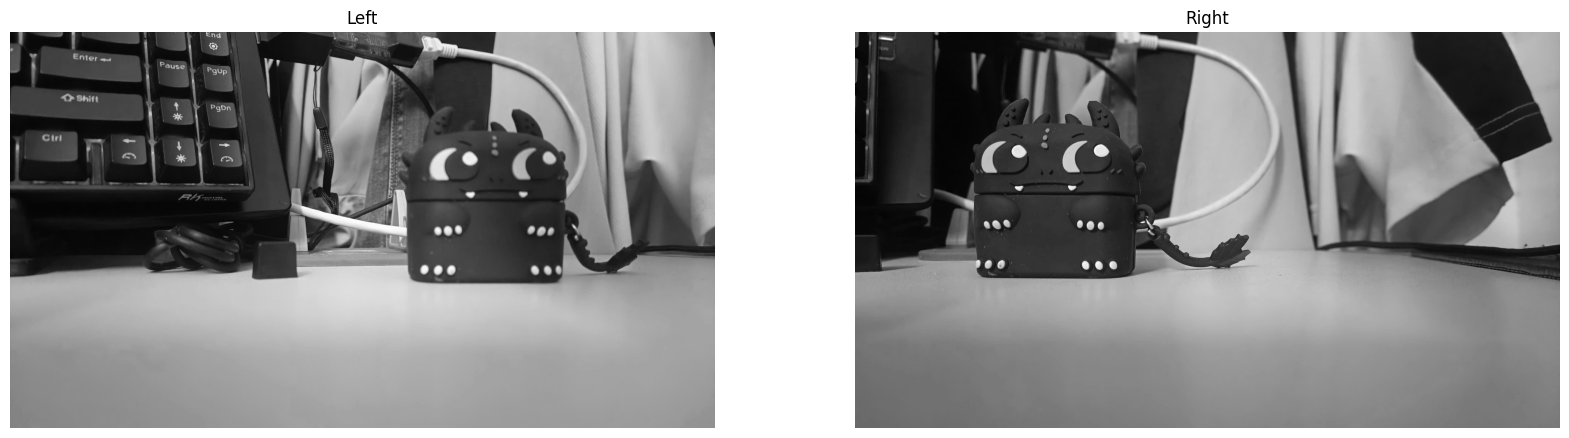

In [4]:
# Displaying images
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.imshow(imgLeft, cmap='gray')
plt.axis('off')
plt.title('Left')
plt.subplot(1, 2, 2)
plt.imshow(imgRight, cmap='gray')
plt.axis('off')
plt.title('Right')
plt.show()

# Perform features matching using SIFT for testing

In [5]:
lowe_threshold = 0.98

In [6]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(imgLeft, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(imgRight, None)

# Match keypoints using BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)

# Filter good matches using Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < lowe_threshold * n.distance:
        good_matches.append(m)

# Visualize the matches
matched_img = cv2.drawMatches(imgLeft, keypoints_1, imgRight, keypoints_2, good_matches, imgLeft, flags=2)

# Save or display the result
cv2.imwrite('matched_keypoints.jpg', matched_img)

True

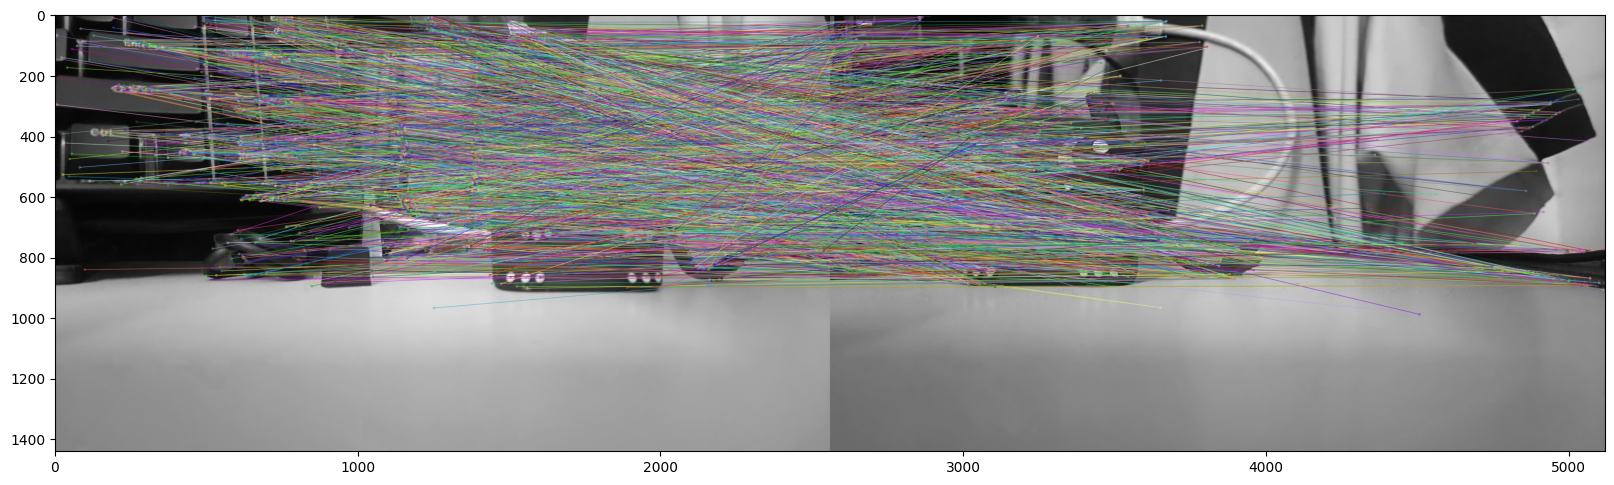

In [7]:
plt.figure(figsize=(20, 6))
result = plt.imread('matched_keypoints.jpg')
plt.imshow(result)

# Define a bounding box for the object that i want to measure the depth

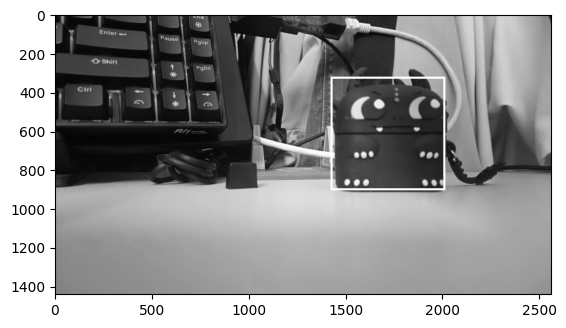

In [8]:
# Define the bounding box coordinates
x1, y1 = 1424, 327
x2, y2 = 2005, 901

# Define the rectangle coordinates
top_left = (x1, y1)
bottom_right = (x2, y2)

# Draw the rectangle (blue color, thickness 2)
cv2.rectangle(imgLeft, top_left, bottom_right, (255, 0, 0), 10)

# Display the image with the rectangle
plt.imshow(imgLeft, cmap='gray')

# How to calculate the distance

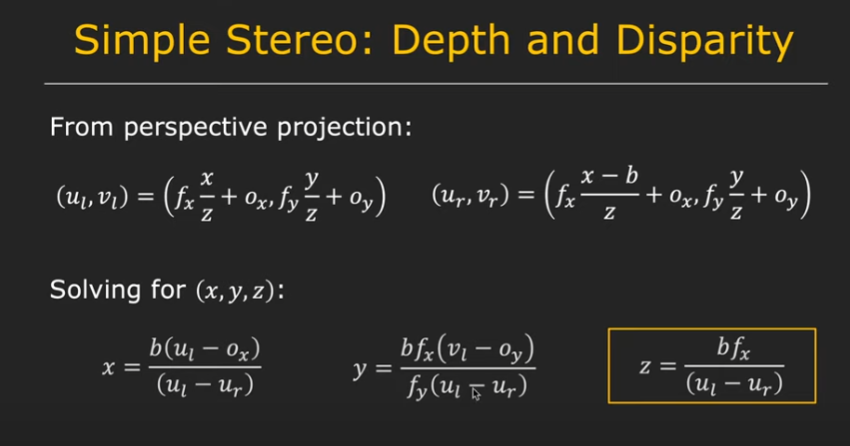

In [9]:
# baseline 
b = 10 # cm
fx = 1887.5281503864207

# Perform the features matching again, saved the matching points that is in the bbox

In [31]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(imgLeft, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(imgRight, None)

# Match keypoints using BFMatcher
bf = cv2.BFMatcher(crossCheck=True)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)

# Match descriptors.
matches = bf.match(descriptors_1,descriptors_2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)


# Filter good matches using Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < .98 * n.distance:
        good_matches.append(m)

# Save matched keypoints within the bounding box to a text file
distance = list()
with open('matched_keypoints_in_bbox.txt', 'w') as f:
    for match in good_matches:
        kp1_idx = match.queryIdx
        kp2_idx = match.trainIdx
        x1_kp, y1_kp = keypoints_1[kp1_idx].pt
        x2_kp, y2_kp = keypoints_2[kp2_idx].pt
        if x1 <= x1_kp <= x2 and y1 <= y1_kp <= y2:
            f.write(f"Keypoint {kp1_idx} in image 1: ({x1_kp:.2f}, {y1_kp:.2f}) matches with keypoint {kp2_idx} in image 2: ({x2_kp:.2f}, {y2_kp:.2f})\n")
            # Calculate the distance
            z = b * fx  / (x1_kp - x2_kp)
            distance.append(z)
print("Matched keypoints within the bounding box saved to 'matched_keypoints_in_bbox.txt'")

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\batch_distance.cpp:282: error: (-215:Assertion failed) (type == CV_8U && dtype == CV_32S) || dtype == CV_32F in function 'cv::batchDistance'


In [57]:
import cv2 as cv


MIN_MATCH_COUNT = 10000
  
# Initiate SIFT detector
sift = cv.SIFT_create()
 
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imgLeft,None)
kp2, des2 = sift.detectAndCompute(imgRight,None)
 
FLANN_INDEX_KDTREE = 5
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
 
flann = cv.FlannBasedMatcher(index_params, search_params)
 
matches = flann.knnMatch(des1,des2,k=2)
 
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.99*n.distance:
        good.append(m)

# Save matched keypoints within the bounding box to a text file
distance = list()
with open('matched_keypoints_in_bbox.txt', 'w') as f:
    for match in good_matches:
        kp1_idx = match.queryIdx
        kp2_idx = match.trainIdx
        x1_kp, y1_kp = keypoints_1[kp1_idx].pt
        x2_kp, y2_kp = keypoints_2[kp2_idx].pt
        if x1 <= x1_kp <= x2 and y1 <= y1_kp <= y2:
            f.write(f"Keypoint {kp1_idx} in image 1: ({x1_kp:.2f}, {y1_kp:.2f}) matches with keypoint {kp2_idx} in image 2: ({x2_kp:.2f}, {y2_kp:.2f})\n")
            # Calculate the distance
            z = b * fx  / (x1_kp - x2_kp)
            distance.append(z)
print("Matched keypoints within the bounding box saved to 'matched_keypoints_in_bbox.txt'")

# Visualize the matches
matched_img = cv2.drawMatches(imgLeft, keypoints_1, imgRight, keypoints_2, good_matches, imgLeft, flags=2)

# Save or display the result
cv2.imwrite('matched_keypoints.jpg', matched_img)

Matched keypoints within the bounding box saved to 'matched_keypoints_in_bbox.txt'


True

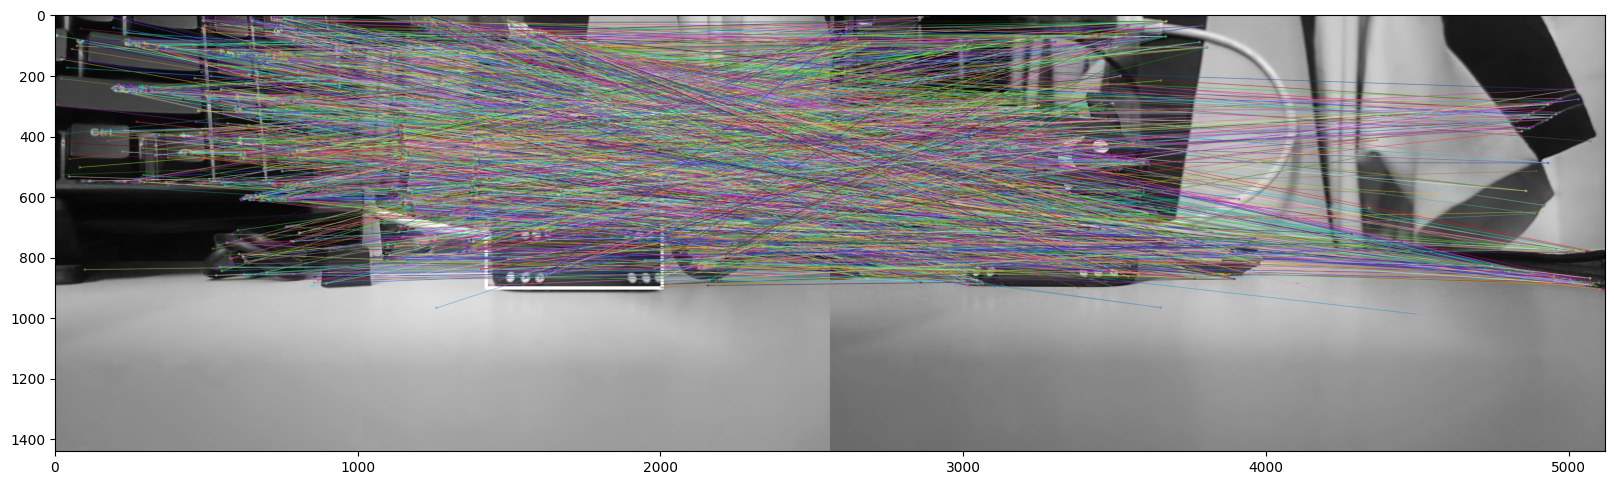

In [58]:
plt.figure(figsize=(20, 6))
result = plt.imread('matched_keypoints.jpg')
plt.imshow(result)

In [35]:
threshold = 2  # zscore threshold

# Statisticly verify the results of various matched points

In [36]:
df = pd.DataFrame({
    'distance': distance
})

df.head().T

0          1          2         3          4
distance -59.373735  38.718395 -45.159209  19.68112  22.799171

In [37]:
df.describe().T

count       mean        std         min       25%        50%  \
distance  112.0  23.947402  48.257994 -140.039003  16.17742  19.614014   

                75%         max  
distance  26.284322  397.960365

In [ ]:
score = np.abs(stats.zscore(df['distance']))
df = df[score < threshold]
len(df)

In [ ]:
df.describe().T

In [ ]:
df.plot(kind='hist')

## Result

In [ ]:
hist, bin_edges = np.histogram(df['distance'], bins=10)
mode_index = np.argmax(hist)
print(mode_index)

new_df = df[(df['distance'] >= bin_edges[mode_index]) & (df['distance'] <= bin_edges[mode_index + 1])]
print(f"The estimate distance is: {new_df['distance'].mean()}cm")

# Filter out by pixel threshold first approach

In [ ]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(imgLeft, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(imgRight, None)

# Match keypoints using BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)

# Filter good matches using Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < lowe_threshold * n.distance:
        good_matches.append(m)

# Save matched keypoints within the bounding box to a text file
distance = list()
with open('matched_keypoints_in_bbox.txt', 'w') as f:
    for match in good_matches:
        kp1_idx = match.queryIdx
        kp2_idx = match.trainIdx
        x1_kp, y1_kp = keypoints_1[kp1_idx].pt
        x2_kp, y2_kp = keypoints_2[kp2_idx].pt
        if x1 <= x1_kp <= x2 and y1 <= y1_kp <= y2:
            f.write(f"Keypoint {kp1_idx} in image 1: ({x1_kp:.2f}, {y1_kp:.2f}) matches with keypoint {kp2_idx} in image 2: ({x2_kp:.2f}, {y2_kp:.2f})\n")
            
            if abs(y1_kp - y2_kp) <= 50 and abs(x1_kp - x2_kp) >= 800:
                z = b * fx  / (x1_kp - x2_kp)
                distance.append(z)
                
print("Matched keypoints within the bounding box saved to 'matched_keypoints_in_bbox.txt'")

In [ ]:
df = pd.DataFrame({
    'distance': distance
})
print(len(df))

df.head()

In [ ]:
df.describe().T

In [ ]:
score = np.abs(stats.zscore(df['distance']))
df = df[score < threshold]
df.T

In [ ]:
df.describe().T

In [ ]:
df.plot(kind='hist')

## Result

In [ ]:
print(f"The estimate distance is: {df['distance'].mean()}cm")

# Fixing matcher

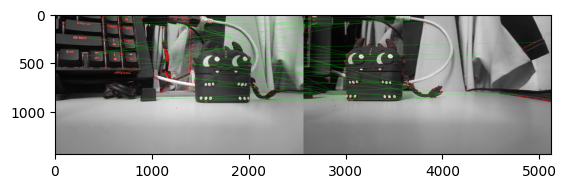

True

In [67]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('images/left.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('images/right.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create(edgeThreshold=)
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()
cv2.imwrite("result.png", img3)

# Radius matching using BFmatcher

In [68]:
import numpy as np
import cv2 as cv

# Initialize the SIFT detector
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(imgLeft, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(imgRight, None)

# Match keypoints using BFMatcher with radius matching
bf = cv.BFMatcher()

# Define a radius for matching
radius = 50  # Adjust this value based on your dataset

# Perform radius matching
matches = bf.radiusMatch(descriptors_1, descriptors_2, radius)

# Filter good matches
good_matches = []
for match_group in matches:
    for match in match_group:
        good_matches.append(match)

# Save matched keypoints within the bounding box to a text file
distance = []
with open('matched_keypoints_in_bbox.txt', 'w') as f:
    for match in good_matches:
        kp1_idx = match.queryIdx
        kp2_idx = match.trainIdx
        x1_kp, y1_kp = keypoints_1[kp1_idx].pt
        x2_kp, y2_kp = keypoints_2[kp2_idx].pt
        
        if x1 <= x1_kp <= x2 and y1 <= y1_kp <= y2:
            f.write(f"Keypoint {kp1_idx} in image 1: ({x1_kp:.2f}, {y1_kp:.2f}) matches with keypoint {kp2_idx} in image 2: ({x2_kp:.2f}, {y2_kp:.2f})\n")
            
            if abs(y1_kp - y2_kp) <= 50 and abs(x1_kp - x2_kp) >= 800:
                z = b * fx / (x1_kp - x2_kp)
                distance.append(z)

print("Matched keypoints within the bounding box saved to 'matched_keypoints_in_bbox.txt'")

Matched keypoints within the bounding box saved to 'matched_keypoints_in_bbox.txt'


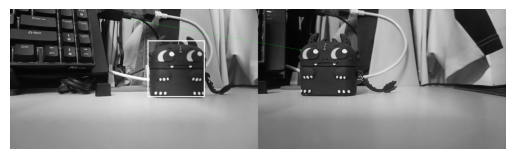

Matched keypoints image saved as 'matched_keypoints_image.png'


In [69]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Initialize the SIFT detector
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(imgLeft, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(imgRight, None)

# Match keypoints using BFMatcher with radius matching
bf = cv.BFMatcher()

# Define a radius for matching
radius = 50  # Adjust this value based on your dataset

# Perform radius matching
matches = bf.radiusMatch(descriptors_1, descriptors_2, radius)

# Filter good matches
good_matches = []
for match_group in matches:
    for match in match_group:
        good_matches.append(match)

# Draw matches
draw_params = dict(matchColor=(0, 255, 0),  # Green color for matches
                   singlePointColor=(255, 0, 0),  # Red for single points
                   flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Create a combined image
img_matches = cv.drawMatches(imgLeft, keypoints_1, imgRight, keypoints_2, good_matches, None, **draw_params)

# Save the image with matched keypoints
cv.imwrite('matched_keypoints_image.png', img_matches)

# Optionally display the result
plt.imshow(img_matches)
plt.axis('off')  # Hide axes
plt.show()

print("Matched keypoints image saved as 'matched_keypoints_image.png'")

# ORB instead of SIFT

In [70]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
 
img1 = cv.imread('images/left.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('images/right.jpg',cv.IMREAD_GRAYSCALE) # trainImage
 
# Initiate ORB detector
orb = cv.ORB_create()
 
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

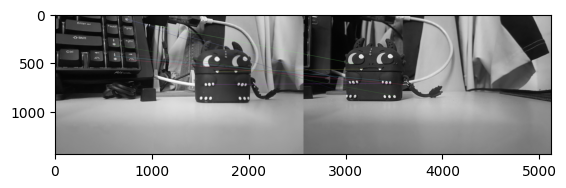

In [72]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
 
# Match descriptors.
matches = bf.match(des1,des2)
 
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.imshow(img3)
plt.show()

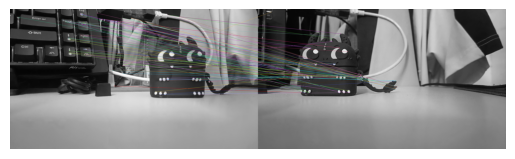

Image with first 10 matches saved as 'matched_keypoints_first_10.png'


In [74]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(img3)
plt.axis('off')  # Hide axes
plt.show()

# Save the image with matches
cv.imwrite('matched_keypoints_first_10.png', img3)

print("Image with first 10 matches saved as 'matched_keypoints_first_10.png'")

# Using Deeplearning

In [75]:
!pip install kornia  kornia-rs  kornia_moons opencv-python --upgrade

   ---------------------------------------- 0.0/833.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/833.3 kB 660.6 kB/s eta 0:00:02
   ----- ---------------------------------- 112.6/833.3 kB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 235.5/833.3 kB 1.6 MB/s eta 0:00:01
   ---------------------- ----------------- 471.0/833.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------- ----------- 583.7/833.3 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 833.3/833.3 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.3 MB 9.6 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 8.5 MB/s eta 0:00:01
   ----------------------------------- ---- 1.1/1.3 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.3 MB/s eta 0:00:00


In [140]:
import cv2
import kornia as K
import kornia.feature as KF
import matplotlib.pyplot as plt
import numpy as np
import torch
from kornia_moons.viz import draw_LAF_matches

In [170]:
from kornia.feature import LoFTR

img1 = K.io.load_image('images/left.jpg', K.io.ImageLoadType.RGB32)[None, ...]
img2 = K.io.load_image('images/right.jpg', K.io.ImageLoadType.RGB32)[None, ...]
print(img1.shape)
print(img2.shape)

img1 = K.geometry.resize(img1, (512, 512), antialias=True)
img2 = K.geometry.resize(img2, (512, 512), antialias=True)

torch.Size([1, 3, 1440, 2560])
torch.Size([1, 3, 1440, 2560])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


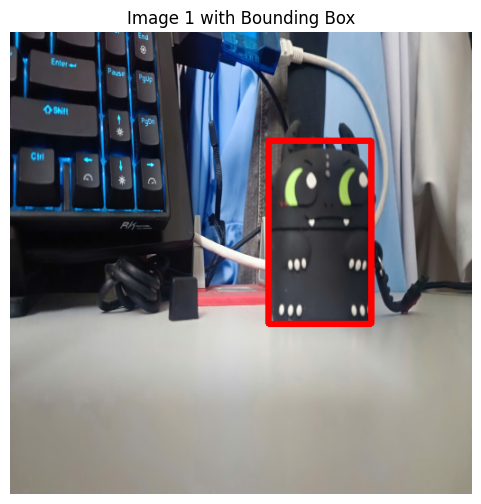

In [177]:
import kornia as K
import matplotlib.pyplot as plt
import cv2

# Load and resize Image 1
img1 = K.io.load_image('images/left.jpg', K.io.ImageLoadType.RGB32)[None, ...]
img1_resized = K.geometry.resize(img1, (512, 512), antialias=True)

# Convert to NumPy array for OpenCV and Matplotlib compatibility
img1_resized_np = img1_resized.squeeze().permute(1, 2, 0).cpu().numpy()

# Define the bounding box coordinates
x1, y1 = 286, 120
x2, y2 = 400, 323

# Define the rectangle coordinates
top_left = (x1, y1)
bottom_right = (x2, y2)

# Make a copy of the image to draw the rectangle on
img1_with_bbox = img1_resized_np.copy()

# Draw the rectangle (blue color, thickness 2)
cv2.rectangle(img1_with_bbox, top_left, bottom_right, (255, 0, 0), 5)

# Plot the image with the bounding box
plt.figure(figsize=(6, 6))
plt.imshow(img1_with_bbox)
plt.title('Image 1 with Bounding Box')
plt.axis('off')  # Turn off axis
plt.show()

In [144]:
matcher = LoFTR(pretrained="outdoor")

In [145]:
input_dict = {
    "image0": K.color.rgb_to_grayscale(img1),
    "image1": K.color.rgb_to_grayscale(img2),
}

In [146]:
with torch.inference_mode():
    correspondences = matcher(input_dict)

In [147]:
mkpts0 = correspondences["keypoints0"].cpu().numpy()
mkpts1 = correspondences["keypoints1"].cpu().numpy()
Fm, inliers = cv2.findFundamentalMat(mkpts0, mkpts1, cv2.USAC_MAGSAC, 0.5, 0.999, 100000)
inliers = inliers > 0

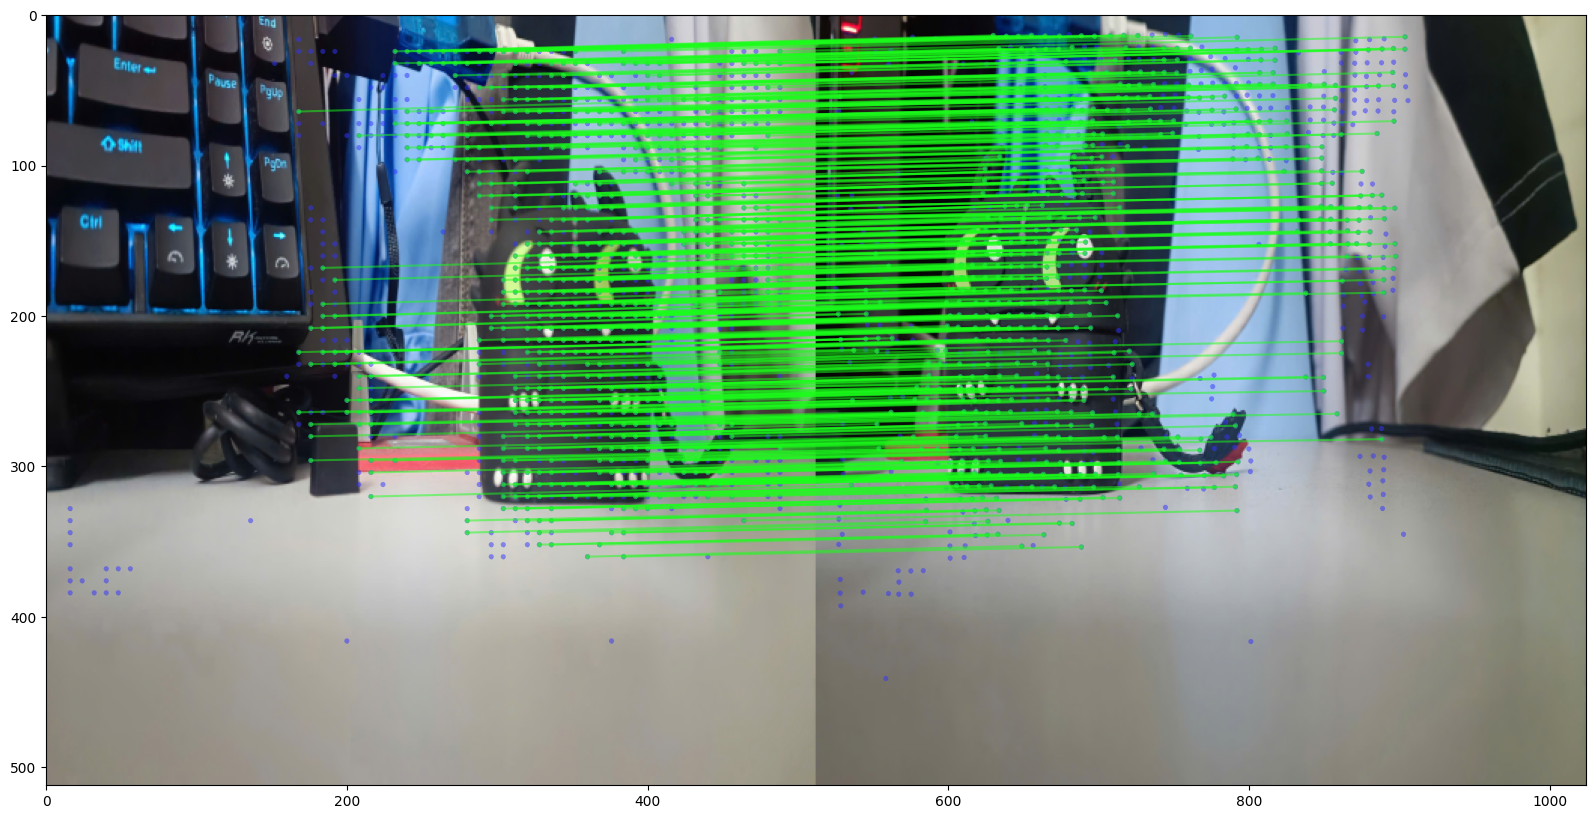

In [148]:
draw_LAF_matches(
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts0).view(1, -1, 2),
        torch.ones(mkpts0.shape[0]).view(1, -1, 1, 1),
        torch.ones(mkpts0.shape[0]).view(1, -1, 1),
    ),
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts1).view(1, -1, 2),
        torch.ones(mkpts1.shape[0]).view(1, -1, 1, 1),
        torch.ones(mkpts1.shape[0]).view(1, -1, 1),
    ),
    torch.arange(mkpts0.shape[0]).view(-1, 1).repeat(1, 2),
    K.tensor_to_image(img1),
    K.tensor_to_image(img2),
    inliers,
    draw_dict={
        "inlier_color": (0.1, 1, 0.1, 0.5),
        "tentative_color": None,
        "feature_color": (0.2, 0.2, 1, 0.5),
        "vertical": False,
    },
)

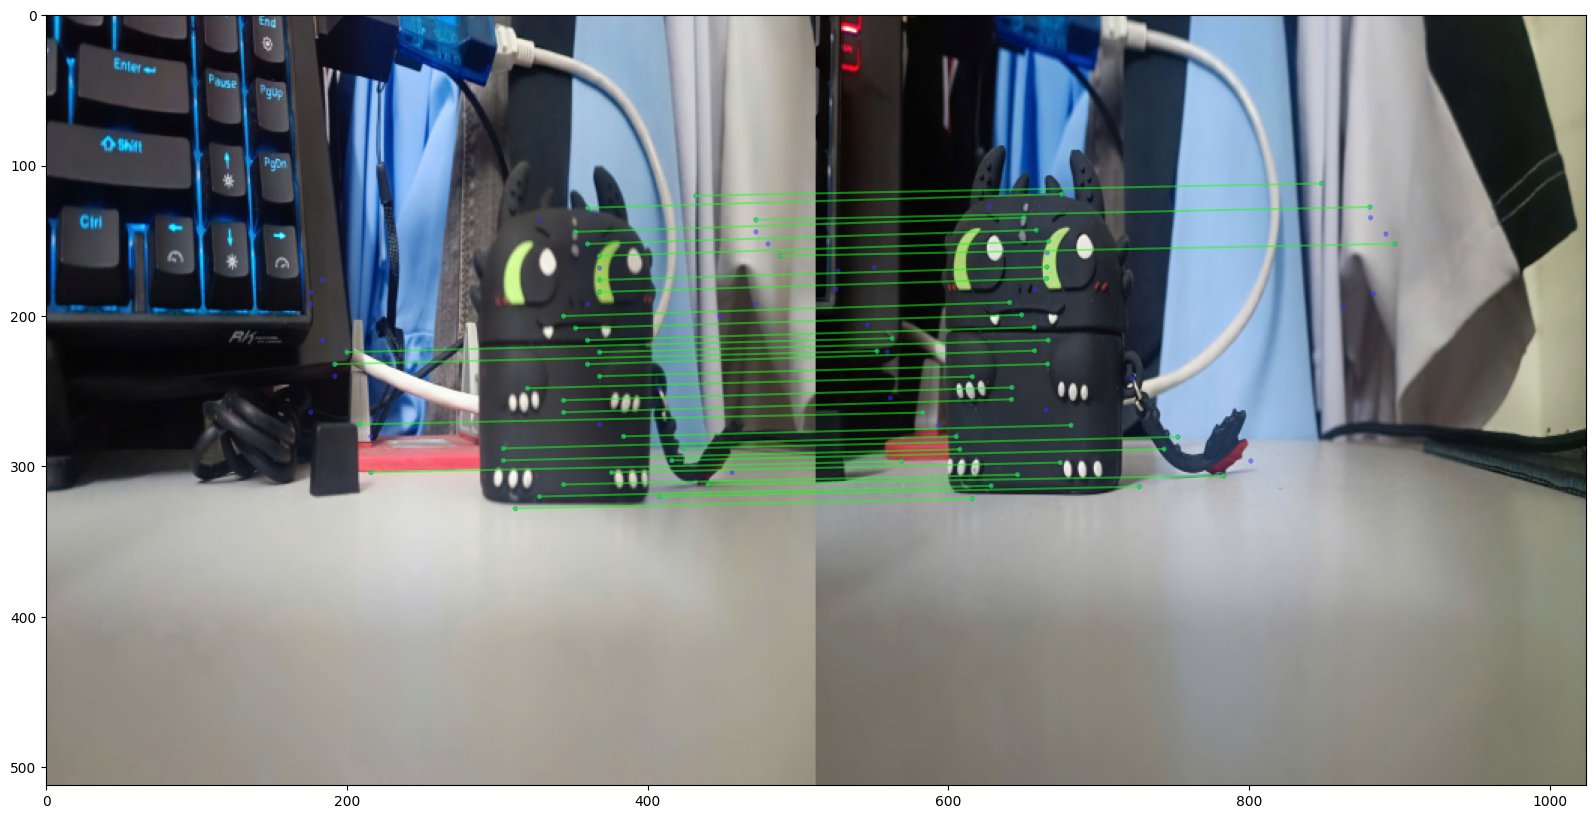

In [149]:
# Assuming mkpts0 and mkpts1 are your matched keypoints and inliers is a boolean array
num_features_to_draw = 800  # Maximum number of features to visualize
start_index = 300  # Starting index

# Ensure you do not exceed the number of available keypoints
num_features_to_draw = min(num_features_to_draw, mkpts0.shape[0])

# Calculate the indices of the features to draw, starting from `start_index` and taking every 10th feature
indices_to_draw = np.arange(start_index, num_features_to_draw, 10)

# Limit the indices to the number of available keypoints
indices_to_draw = indices_to_draw[indices_to_draw < mkpts0.shape[0]]

# Draw matches for the selected features
draw_LAF_matches(
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts0[indices_to_draw]).view(1, -1, 2),
        torch.ones(len(indices_to_draw)).view(1, -1, 1, 1),
        torch.ones(len(indices_to_draw)).view(1, -1, 1),
    ),
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts1[indices_to_draw]).view(1, -1, 2),
        torch.ones(len(indices_to_draw)).view(1, -1, 1, 1),
        torch.ones(len(indices_to_draw)).view(1, -1, 1),
    ),
    torch.arange(len(indices_to_draw)).view(-1, 1).repeat(1, 2),
    K.tensor_to_image(img1),
    K.tensor_to_image(img2),
    inliers[indices_to_draw],  # Adjust inliers to match the selected features
    draw_dict={
        "inlier_color": (0.1, 1, 0.1, 0.5),
        "tentative_color": None,
        "feature_color": (0.2, 0.2, 1, 0.5),
        "vertical": False,
    },
)

In [150]:
# Assuming mkpts0 and mkpts1 are your matched keypoints and inliers is a boolean array
num_features_to_draw = 800  # Maximum number of features to visualize
start_index = 300  # Starting index

# Ensure you do not exceed the number of available keypoints
num_features_to_draw = min(num_features_to_draw, mkpts0.shape[0])

# Calculate the indices of the features to draw, starting from `start_index` and taking every 10th feature
indices_to_draw = np.arange(start_index, num_features_to_draw, 10)

# Limit the indices to the number of available keypoints
indices_to_draw = indices_to_draw[indices_to_draw < mkpts0.shape[0]]

# Draw matches for the selected features
draw_LAF_matches(
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts0[indices_to_draw]).view(1, -1, 2),
        torch.ones(len(indices_to_draw)).view(1, -1, 1, 1),
        torch.ones(len(indices_to_draw)).view(1, -1, 1),
    ),
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts1[indices_to_draw]).view(1, -1, 2),
        torch.ones(len(indices_to_draw)).view(1, -1, 1, 1),
        torch.ones(len(indices_to_draw)).view(1, -1, 1),
    ),
    torch.arange(len(indices_to_draw)).view(-1, 1).repeat(1, 2),
    K.tensor_to_image(img1),
    K.tensor_to_image(img2),
    inliers[indices_to_draw],  # Adjust inliers to match the selected features
    draw_dict={
        "inlier_color": (0.1, 1, 0.1, 0.5),
        "tentative_color": None,
        "feature_color": (0.2, 0.2, 1, 0.5),
        "vertical": False,
    },
)

# Save the current figure as 'result.png'
plt.savefig("result.png", bbox_inches='tight', dpi=300)  # Adjust dpi as needed
plt.close()  # Close the plot to free up memory

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mkpts0 and mkpts1 are your matched keypoints and inliers is a boolean array
num_features_to_draw = 800  # Maximum number of features to visualize
start_index = 300  # Starting index

# Ensure you do not exceed the number of available keypoints
num_features_to_draw = min(num_features_to_draw, mkpts0.shape[0])

# Calculate the indices of the features to draw, starting from `start_index` and taking every 10th feature
indices_to_draw = np.arange(start_index, num_features_to_draw, 10)

# Limit the indices to the number of available keypoints
indices_to_draw = indices_to_draw[indices_to_draw < mkpts0.shape[0]]

# Draw matches for the selected features
draw_LAF_matches(
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts0[indices_to_draw]).view(1, -1, 2),
        torch.ones(len(indices_to_draw)).view(1, -1, 1, 1),
        torch.ones(len(indices_to_draw)).view(1, -1, 1),
    ),
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts1[indices_to_draw]).view(1, -1, 2),
        torch.ones(len(indices_to_draw)).view(1, -1, 1, 1),
        torch.ones(len(indices_to_draw)).view(1, -1, 1),
    ),
    torch.arange(len(indices_to_draw)).view(-1, 1).repeat(1, 2),
    K.tensor_to_image(img1),
    K.tensor_to_image(img2),
    inliers[indices_to_draw],  # Adjust inliers to match the selected features
    draw_dict={
        "inlier_color": (0.1, 1, 0.1, 0.5),
        "tentative_color": None,
        "feature_color": (0.2, 0.2, 1, 0.5),
        "vertical": False,
    },
)

# Save the current figure as 'result.png'
plt.savefig("result.png", bbox_inches='tight', dpi=300)  # Adjust dpi as needed
plt.close()  # Close the plot to free up memory

# Save matched keypoint coordinates to a text file
with open('matched_keypoints.txt', 'w') as f:
    for idx in indices_to_draw:
        x0, y0 = mkpts0[idx]  # Coordinates from the first image
        x1, y1 = mkpts1[idx]  # Coordinates from the second image
        f.write(f"Keypoint {idx}: Image 1: ({x0:.2f}, {y0:.2f}), Image 2: ({x1:.2f}, {y1:.2f})\n")

print("Result image saved as 'result.png'")
print("Matched keypoints saved to 'matched_keypoints.txt'")

Result image saved as 'result.png'
Matched keypoints saved to 'matched_keypoints.txt'


In [179]:
import numpy as np
import matplotlib.pyplot as plt

img1 = K.io.load_image('images/left.jpg', K.io.ImageLoadType.RGB32)[None, ...]
img2 = K.io.load_image('images/right.jpg', K.io.ImageLoadType.RGB32)[None, ...]
print(img1.shape)
print(img2.shape)

img1 = K.geometry.resize(img1, (512, 512), antialias=True)
img2 = K.geometry.resize(img2, (512, 512), antialias=True)

# Assuming mkpts0 and mkpts1 are your matched keypoints and inliers is a boolean array
num_features_to_draw = 800  # Maximum number of features to visualize
start_index = 300  # Starting index

# Ensure you do not exceed the number of available keypoints
num_features_to_draw = min(num_features_to_draw, mkpts0.shape[0])

# Ensure inliers has the same length as mkpts0 and mkpts1
valid_indices = np.where(inliers[:num_features_to_draw])[0]  # Get valid inlier indices
valid_indices = valid_indices[valid_indices >= start_index]  # Filter to start index

# Calculate the indices of the features to draw, taking every 10th feature
indices_to_draw = valid_indices[::10]

# Limit the indices to the number of available keypoints
indices_to_draw = indices_to_draw[indices_to_draw < mkpts0.shape[0]]

x1, y1 = 1424, 327
x2, y2 = 2005, 901

scale_x, scale_y = 2560/512, 1440/512

print(scale_x, scale_y)

# Define bounding box coordinates
bbox_x1, bbox_y1 = x1 / scale_x, y1 / scale_y
bbox_x2, bbox_y2 = x2 / scale_x, y2 / scale_y

print(bbox_x1, bbox_y1)
print(bbox_x2, bbox_y2)

# Draw matches for the selected features
draw_LAF_matches(
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts0[indices_to_draw]).view(1, -1, 2),
        torch.ones(len(indices_to_draw)).view(1, -1, 1, 1),
        torch.ones(len(indices_to_draw)).view(1, -1, 1),
    ),
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts1[indices_to_draw]).view(1, -1, 2),
        torch.ones(len(indices_to_draw)).view(1, -1, 1, 1),
        torch.ones(len(indices_to_draw)).view(1, -1, 1),
    ),
    torch.arange(len(indices_to_draw)).view(-1, 1).repeat(1, 2),
    K.tensor_to_image(img1),
    K.tensor_to_image(img2),
    inliers[indices_to_draw],  # Adjust inliers to match the selected features
    draw_dict={
        "inlier_color": (0.1, 1, 0.1, 0.5),
        "tentative_color": None,
        "feature_color": (0.2, 0.2, 1, 0.5),
        "vertical": False,
    },
)

# Save the current figure as 'result.png'
plt.savefig("result.jpg", bbox_inches='tight', dpi=300)  # Adjust dpi as needed
plt.close()  # Close the plot to free up memory

# Save matched keypoint coordinates to a text file, filtering by bounding box
with open('matched_keypoints.txt', 'w') as f:
    for idx in indices_to_draw:
        x0, y0 = mkpts0[idx]  # Coordinates from the first image
        x1, y1 = mkpts1[idx]  # Coordinates from the second image
        
        # Check if the keypoints are within the bounding box
        if (x1 >= bbox_x1 and x1 <= bbox_x2) and (y1 >= bbox_y1 and y1 <= bbox_y2):
            pass
        else:
            f.write(f"Keypoint {idx}: Image 1: ({x0:.2f}, {y0:.2f}), Image 2: ({x1:.2f}, {y1:.2f})\n")

print("Result image saved as 'result.jpg'")
print("Matched keypoints saved to 'matched_keypoints.txt'")

torch.Size([1, 3, 1440, 2560])
torch.Size([1, 3, 1440, 2560])
5.0 2.8125
284.8 116.26666666666667
401.0 320.35555555555555
Result image saved as 'result.jpg'
Matched keypoints saved to 'matched_keypoints.txt'


In [ ]:
# x1, y1 = 286, 120
# x2, y2 = 400, 323

In [191]:
# Save matched keypoint coordinates to a text file, filtering by bounding box
with open('matched_keypoints.txt', 'w') as f:
    for idx in indices_to_draw:
        x0, y0 = mkpts0[idx]  # Coordinates from the first image
        x1, y1 = mkpts1[idx]  # Coordinates from the second image
        
        # Check if the keypoints are within the bounding box
        if (x0 <= 286 and x0 >= 400) and (y0 <= 120 and y0 >= 323):
            pass
        else:
            f.write(f"Keypoint {idx}: Image 1: ({x0:.2f}, {y0:.2f}), Image 2: ({x1:.2f}, {y1:.2f})\n")

print("Result image saved as 'result.jpg'")
print("Matched keypoints saved to 'matched_keypoints.txt'")

Result image saved as 'result.jpg'
Matched keypoints saved to 'matched_keypoints.txt'


In [185]:
(1887.5281503864207 * 10)/((352- 137.79) * 5)

17.62315625214902

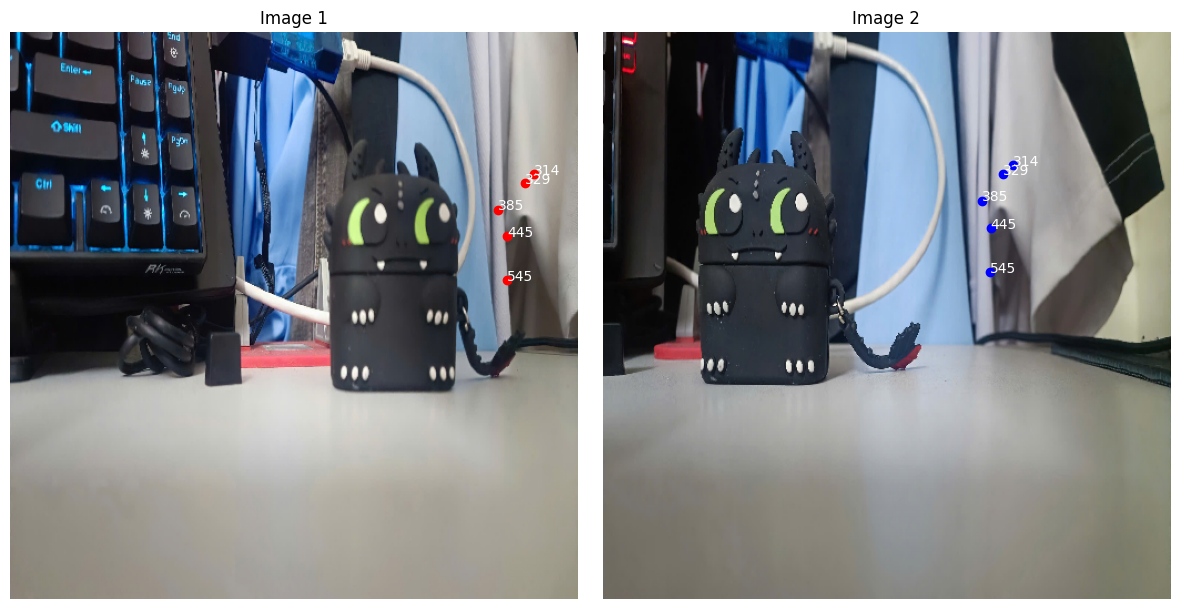

In [154]:
import matplotlib.pyplot as plt
import cv2

# Load the images (make sure to provide the correct paths)
img1 = cv2.imread('images/left.jpg')  # Left image
img2 = cv2.imread('images/right.jpg')  # Right image
img1 = cv2.resize(img1, (512, 512))
img2 = cv2.resize(img2, (512, 512))

# Convert BGR to RGB (OpenCV uses BGR by default)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Matched keypoints data
matched_keypoints = [
    (314, (472.00, 128.00), (369.89, 119.74)),
    (329, (464.00, 136.00), (361.11, 127.86)),
    (385, (440.00, 160.00), (342.08, 151.87)),
    (445, (448.00, 184.00), (349.91, 176.60)),
    (545, (448.00, 224.00), (349.43, 216.72))
]

# Plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image
axes[0].imshow(img1)
axes[0].set_title('Image 1')
axes[0].axis('off')  # Turn off axis

# Display the second image
axes[1].imshow(img2)
axes[1].set_title('Image 2')
axes[1].axis('off')  # Turn off axis

# Plot matched keypoints
for keypoint, (x1, y1), (x2, y2) in matched_keypoints:
    # Plot on Image 1
    axes[0].plot(x1, y1, 'ro')  # Red circle for keypoint in Image 1
    axes[0].text(x1, y1, str(keypoint), color='white', fontsize=10)

    # Plot on Image 2
    axes[1].plot(x2, y2, 'bo')  # Blue circle for keypoint in Image 2
    axes[1].text(x2, y2, str(keypoint), color='white', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

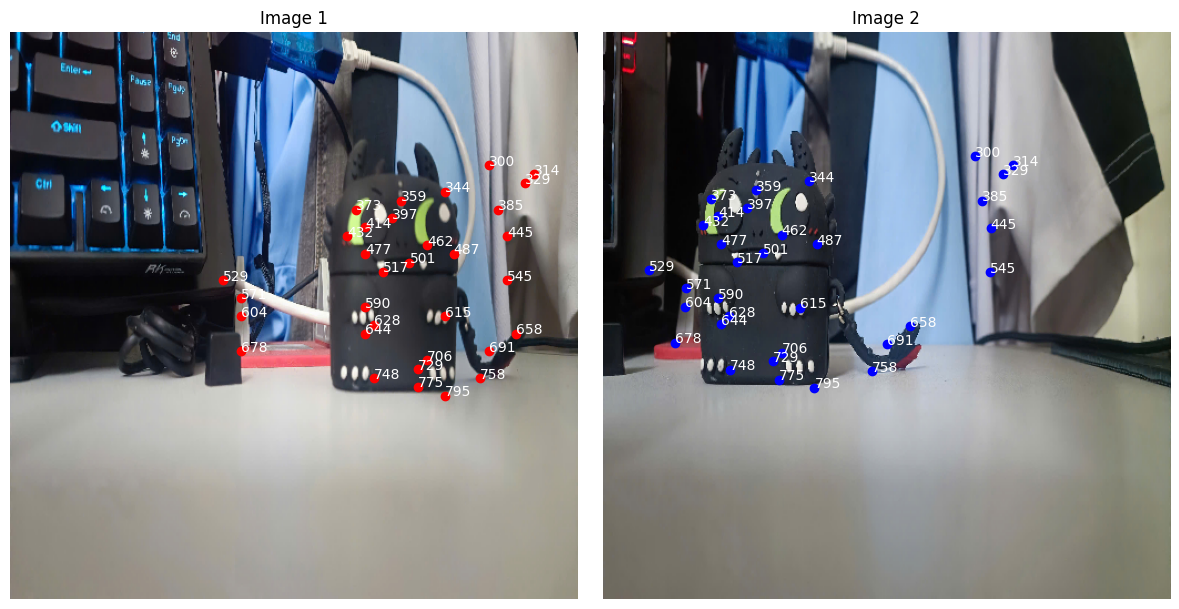

In [192]:
import matplotlib.pyplot as plt
import cv2

# Load the images (make sure to provide the correct paths)
img1 = cv2.imread('images/left.jpg')  # Left image
img2 = cv2.imread('images/right.jpg')  # Right image

# Resize images to (512, 512)
img1 = cv2.resize(img1, (512, 512))
img2 = cv2.resize(img2, (512, 512))

# Convert BGR to RGB (OpenCV uses BGR by default)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# New matched keypoints data
matched_keypoints = [
    (300, (432.00, 120.00), (335.96, 111.86)),
    (314, (472.00, 128.00), (369.89, 119.74)),
    (329, (464.00, 136.00), (361.11, 127.86)),
    (344, (392.00, 144.00), (185.61, 134.52)),
    (359, (352.00, 152.00), (137.79, 142.38)),
    (373, (312.00, 160.00), (97.27, 150.55)),
    (385, (440.00, 160.00), (342.08, 151.87)),
    (397, (344.00, 168.00), (129.62, 158.66)),
    (414, (320.00, 176.00), (104.01, 166.10)),
    (432, (304.00, 184.00), (90.51, 174.15)),
    (445, (448.00, 184.00), (349.91, 176.60)),
    (462, (376.00, 192.00), (161.33, 182.82)),
    (477, (320.00, 200.00), (106.40, 191.07)),
    (487, (400.00, 200.00), (192.86, 191.13)),
    (501, (360.00, 208.00), (144.47, 199.28)),
    (517, (336.00, 216.00), (120.92, 207.50)),
    (529, (192.00, 224.00), (41.30, 214.69)),
    (545, (448.00, 224.00), (349.43, 216.72)),
    (571, (208.00, 240.00), (74.97, 231.15)),
    (590, (320.00, 248.00), (103.97, 240.26)),
    (604, (208.00, 256.00), (74.30, 247.58)),
    (615, (392.00, 256.00), (177.39, 248.48)),
    (628, (328.00, 264.00), (113.79, 256.02)),
    (644, (320.00, 272.00), (106.37, 263.45)),
    (658, (456.00, 272.00), (277.41, 265.12)),
    (678, (208.00, 288.00), (64.79, 280.32)),
    (691, (432.00, 288.00), (255.87, 281.73)),
    (706, (376.00, 296.00), (161.46, 289.12)),
    (729, (368.00, 304.00), (153.26, 297.08)),
    (748, (328.00, 312.00), (114.53, 304.64)),
    (758, (424.00, 312.00), (242.67, 305.75)),
    (775, (368.00, 320.00), (158.61, 313.54)),
    (795, (392.00, 328.00), (190.73, 320.67)),
]

# Plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image
axes[0].imshow(img1)
axes[0].set_title('Image 1')
axes[0].axis('off')  # Turn off axis

# Display the second image
axes[1].imshow(img2)
axes[1].set_title('Image 2')
axes[1].axis('off')  # Turn off axis

# Plot matched keypoints
for keypoint, (x1, y1), (x2, y2) in matched_keypoints:
    # Plot on Image 1
    axes[0].plot(x1, y1, 'ro')  # Red circle for keypoint in Image 1
    axes[0].text(x1, y1, str(keypoint), color='white', fontsize=10)

    # Plot on Image 2
    axes[1].plot(x2, y2, 'bo')  # Blue circle for keypoint in Image 2
    axes[1].text(x2, y2, str(keypoint), color='white', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### Fine-tunning model